## Dependencies and Setup

In [1]:
import pandas as pd
import numpy as np
import io
import requests
import matplotlib.pyplot as plt

# Declare World's ISO Alpha-3 Code value to WRD
world_iso3 = 'WRD'
pd.set_option('display.max_rows', 1000)

## Load Countries to observe into DataFrame

In [2]:
country_csv_path = "Resources/Country/Country.csv"
country_df = pd.read_csv(country_csv_path)
# Set World's ISO Alpha-3 Code value to WRD
country_df = country_df.set_index('Country Name')
country_df.loc['World', 'ISO alpha-3 Code'] = world_iso3
country_df = country_df.reset_index()
country_df.head()

,Country Name,GFN Country Code,ISO alpha-2 Code,ISO alpha-3 Code
0,United States of America,231,US,USA
1,Australia,10,AU,AUS
2,Brazil,21,BR,BRA
3,Canada,33,CA,CAN
4,China,351,CN,CHN


## Load National Footprint Data

In [3]:
nf_csv_path = "Resources/NFA/NFA 2018.csv"
nf_df = pd.read_csv(nf_csv_path)

# Set World's ISO Alpha-3 Code value to WRD
nf_df = nf_df.set_index('country')
nf_df.loc['World', 'ISO alpha-3 code'] = world_iso3
nf_df = nf_df.reset_index()

# Filters: 
# records keeping: BiocapTotGHA 
# records filter out: BiocapPerCap, EFConsPerCap/TotGHA, EFExportsPerCap/TotGHA, EFImportsPerCap/TotGHA, EFProdPerCap/TotGHA
nf_df = nf_df[nf_df['record'] == 'BiocapTotGHA']
nf_df.head()

,country,ISO alpha-3 code,UN_region,UN_subregion,year,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,Percapita GDP (2010 USD),population
1,Armenia,ARM,Asia,Western Asia,1992,BiocapTotGHA,555812.9726,465763.3374,289190.6623,47320.22459,116139.5982,0.0,1474226.795,949.033,3449000
11,Armenia,ARM,Asia,Western Asia,1993,BiocapTotGHA,538659.0959,466181.5956,289695.8367,47293.87727,107720.2388,0.0,1449550.644,886.033,3370000
21,Armenia,ARM,Asia,Western Asia,1994,BiocapTotGHA,537897.6656,473441.0226,289832.8036,47206.96501,103552.5070,0.0,1451930.964,956.471,3290000
31,Armenia,ARM,Asia,Western Asia,1995,BiocapTotGHA,531812.0787,505784.7756,289527.2356,47069.84016,101521.3116,0.0,1475715.242,1043.540,3223000
41,Armenia,ARM,Asia,Western Asia,1996,BiocapTotGHA,612400.5242,538818.3582,289980.1739,47010.04117,112371.3847,0.0,1600580.482,1121.880,3173000


## Set FAO stardand url parametrs

In [4]:
fao_area = 'area=' + '%2C'.join(country_df['GFN Country Code'].apply(str))
fao_year = '&year=' + '%2C'.join(np.arange(1995,2019).astype(str))
fao_area_cs = '&area_cs=FAO'
fao_item_cs = '&item_cs=FAO'
fao_tail = '&show_codes=true&show_unit=true&show_flags=true&null_values=false&output_type=csv'

## Trade : Livestock Products (Import)

In [5]:
# Trade: Livestock Products (Import/Export)
# Set url parametrs
fao_base_url = 'http://fenixservices.fao.org/faostat/api/v1/en/data/TP?'
area_str = '231'
fao_area = '&area=' + area_str
element_str = '2610'
fao_element = '&element=' + element_str
item_str = '2077'
fao_item = '&item=' + item_str

# finalize fao url
tr_fao_url = fao_base_url + fao_area + fao_area_cs + fao_element + fao_item + fao_item_cs + fao_year + fao_tail
fao_value = '&value='

# Request Trade: Livestock Products Data from FOA
response = requests.get(tr_fao_url)
decoded_content = response.content.decode('ISO-8859-1')
# Store CSV to DataFrame
pd.set_option('display.max_rows', 100)
fao_tr_import_df = pd.read_csv(io.BytesIO(response.content), encoding='ISO-8859-1')
fao_tr_import_df.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,TP,Crops and livestock products,231,United States of America,5610,Import Quantity,2077,Total Meat,1995,1995,tonnes,1110292,A,"Aggregate, may include official, semi-official..."
1,TP,Crops and livestock products,231,United States of America,5610,Import Quantity,2077,Total Meat,1996,1996,tonnes,1199617,A,"Aggregate, may include official, semi-official..."
2,TP,Crops and livestock products,231,United States of America,5610,Import Quantity,2077,Total Meat,1997,1997,tonnes,1335282,A,"Aggregate, may include official, semi-official..."
3,TP,Crops and livestock products,231,United States of America,5610,Import Quantity,2077,Total Meat,1998,1998,tonnes,1509419,A,"Aggregate, may include official, semi-official..."
4,TP,Crops and livestock products,231,United States of America,5610,Import Quantity,2077,Total Meat,1999,1999,tonnes,1671894,A,"Aggregate, may include official, semi-official..."


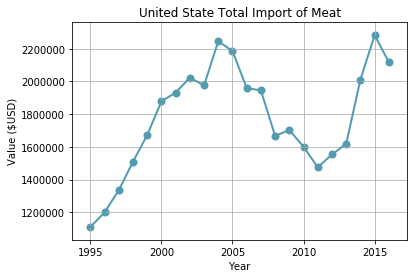

In [6]:
import matplotlib.pyplot as plt

us_results = plt.plot(fao_tr_import_df['Year'], fao_tr_import_df['Value'], lw = 2, color = '#539caf', alpha = 1)
fao_tr_import_df ['Value']
plt.scatter(fao_tr_import_df['Year'], fao_tr_import_df['Value'], lw = 2, color = '#539caf', alpha = 1)
#total = plt.plot(fao_year, color="blue", label="Total")
plt.title("United State Total Import of Meat")
plt.xlabel("Year")
plt.ylabel("Value ($USD)")
plt.grid()
plt.show()

### Trade : Livestock Products (Export)

In [7]:
# Trade: Livestock Products (Import/Export)
# Set url parametrs
fao_base_url = 'http://fenixservices.fao.org/faostat/api/v1/en/data/TP?'
area_str = '231%2C5000%2C5706%2C5801%21%351%100%185%202'

fao_area = '&area=' + area_str
element_str = '2610'
fao_element = '&element=' + element_str
item_str = '2077'
fao_item = '&item=' + item_str


# finalize fao url
tr_fao_url = fao_base_url + fao_area + fao_area_cs + fao_element + fao_item  + fao_item_cs + fao_year + fao_tail

# Request Trade: Livestock Products Data from FOA
response = requests.get(tr_fao_url)
decoded_content = response.content.decode('ISO-8859-1')
# Store CSV to DataFrame
fao_tr_export_df = pd.read_csv(io.BytesIO(response.content), encoding='ISO-8859-1')
fao_tr_export_df.head()


,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,TP,Crops and livestock products,231,United States of America,5610,Import Quantity,2077,Total Meat,1995,1995,tonnes,1110292,A,"Aggregate, may include official, semi-official..."
1,TP,Crops and livestock products,231,United States of America,5610,Import Quantity,2077,Total Meat,1996,1996,tonnes,1199617,A,"Aggregate, may include official, semi-official..."
2,TP,Crops and livestock products,231,United States of America,5610,Import Quantity,2077,Total Meat,1997,1997,tonnes,1335282,A,"Aggregate, may include official, semi-official..."
3,TP,Crops and livestock products,231,United States of America,5610,Import Quantity,2077,Total Meat,1998,1998,tonnes,1509419,A,"Aggregate, may include official, semi-official..."
4,TP,Crops and livestock products,231,United States of America,5610,Import Quantity,2077,Total Meat,1999,1999,tonnes,1671894,A,"Aggregate, may include official, semi-official..."


In [8]:
fao_tr_export_df[['Area', 'Value']]
area_group_df = fao_tr_export_df.groupby(['Area'])
area_group_df.sum()['Value']

Area
European Union              262039323
United States of America     39001075
World                       682080850
Name: Value, dtype: int64

In [9]:
'http://fenixservices.fao.org/faostat/api/v1/en/data/TP?area=231%2C5000%2C5706%2C5801&area_cs=FAO&element=2610&item=2077&item_cs=FAO&year=1995%2C1996%2C1997%2C1998%2C1999%2C2000%2C2001%2C2002%2C2003%2C2004%2C2005%2C2006%2C2007%2C2008%2C2009%2C2010%2C2011%2C2012%2C2013%2C2014%2C2015%2C2016&show_codes=true&show_unit=true&show_flags=true&null_values=false&output_type=csv'

'http://fenixservices.fao.org/faostat/api/v1/en/data/TP?area=231%2C5000%2C5706%2C5801&area_cs=FAO&element=2610&item=2077&item_cs=FAO&year=1995%2C1996%2C1997%2C1998%2C1999%2C2000%2C2001%2C2002%2C2003%2C2004%2C2005%2C2006%2C2007%2C2008%2C2009%2C2010%2C2011%2C2012%2C2013%2C2014%2C2015%2C2016&show_codes=true&show_unit=true&show_flags=true&null_values=false&output_type=csv'

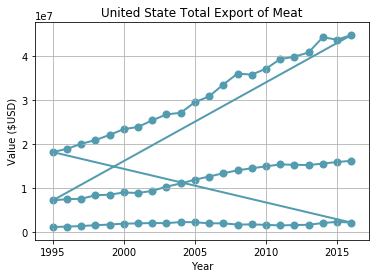

In [10]:
import matplotlib.pyplot as plt

us_results = plt.plot(fao_tr_export_df['Year'], fao_tr_export_df['Value'], lw = 2, color = '#539caf', alpha = 1)
fao_tr_export_df ['Value']
#total = plt.plot(fao_year, color="blue", label="Total")
plt.scatter(fao_tr_export_df['Year'], fao_tr_export_df['Value'], lw = 2, color = '#539caf', alpha = 1)
plt.title("United State Total Export of Meat")
plt.xlabel("Year")
plt.ylabel("Value ($USD)")
#x = [1995, 2000, 2005, 2010, 2015]
#plt.xticks(x, labels, rotation='vertical')
#plt.xticks(np.arange(1995,2019), labels, rotation='vertical')
#labels = np.arange(1995,2019)
plt.grid()
plt.show()